In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

In [4]:
y_vals = {'Brad Pitt': 0, 'Hugh Jackman': 1, 'Johnny Depp': 2, 
          'Leonardo DiCaprio': 3, 'Robert Downey Jr': 4, 
          'Tom Cruise': 5, 'Tom Hanks': 6, 'Will Smith': 7}

# convert pictures to np arrays with their labels

def load_data (image_dir_path, y_vals):
    X, y = [], []   # for img_arr and their labels
    for name,label in y_vals.items():
        person_folder = os.path.join(image_dir_path, name)
        for img_name in os.listdir(person_folder):
            img_path = os.path.join(person_folder,img_name)
            img = load_img(img_path, target_size=(128,128))
            img_arr = img_to_array(img) / 255.0
            X.append(img_arr)
            y.append(label)
    return np.array(X), np.array(y)

    
image_dir_path = r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\Face_recognition\Celebrity Faces Dataset"
X , y = load_data(image_dir_path, y_vals)



In [6]:
#  split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(np.unique(y_train))


(640, 128, 128, 3)
(640,)
(160, 128, 128, 3)
(160,)
[0 1 2 3 4 5 6 7]


In [13]:
# build cnn

model = models.Sequential([
    # cnn layers
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    # flatten
    layers.Flatten(),

    # fully connected layer
    layers.Dense(128,activation="relu"),
    layers.Dense(len(y_vals),activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

C:\Users\Manthan\.conda\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 464ms/step - accuracy: 0.1126 - loss: 4.1688 - val_accuracy: 0.1172 - val_loss: 2.0820
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 456ms/step - accuracy: 0.1677 - loss: 2.0554 - val_accuracy: 0.1094 - val_loss: 2.0855
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.2791 - loss: 1.9327 - val_accuracy: 0.1875 - val_loss: 2.0307
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.4883 - loss: 1.5900 - val_accuracy: 0.2109 - val_loss: 2.1097
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.6495 - loss: 1.1225 - val_accuracy: 0.2656 - val_loss: 2.0755
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 437ms/step - accuracy: 0.8737 - loss: 0.5914 - val_accuracy: 0.2812 - val_loss: 2.3286
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.9508 - loss: 0.2902 - val_accuracy: 0.2734 - val_loss: 2.6574
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.9922 - loss: 0.1010 - val_accuracy:

In [11]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')
print(f'Test loss: {test_loss*100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2947 - loss: 4.1009
Test accuracy: 28.12%
Test loss: 390.26%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


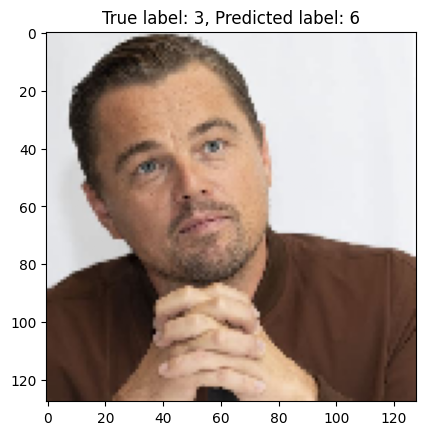

In [15]:
def visualize_test_image(index):
    # Get the test image and true label
    test_image = X_test[index].reshape(128,128,3)
    true_label = y_test[index]
    
    # Predict the label
    predicted_label = np.argmax(model.predict(X_test[index:index+1]))
    
    # Plot the image and labels
    plt.imshow(test_image, cmap='gray')
    plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
    plt.show()

visualize_test_image(14)


